In [1]:
# 📌 Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# 📌 Cell 2: Upload and load the dataset
from google.colab import files
uploaded = files.upload()

# Load CSV into a DataFrame
df = pd.read_csv('Mall_Customers.csv')
df.head()

Saving Mall_Customers.csv to Mall_Customers.csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# 📌 Cell 3: Check dataset structure and missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [4]:
# 📌 Cell 4: Select numerical features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [5]:
# 📌 Cell 5: Optional - PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df.head()

,PC1,PC2
0,-31.870508,-33.001425
1,0.763397,-56.843865
2,-57.408726,-13.122936
3,-2.169896,-53.477905
4,-32.174920,-30.387005


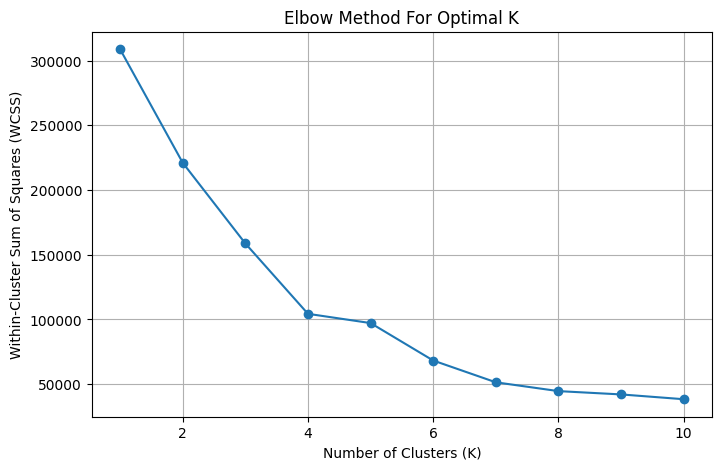

In [6]:
# 📌 Cell 6: Use the Elbow Method to find the optimal number of clusters (K)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [7]:
# 📌 Cell 7: Fit KMeans with chosen number of clusters (e.g., K=5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

df['Cluster'] = clusters
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


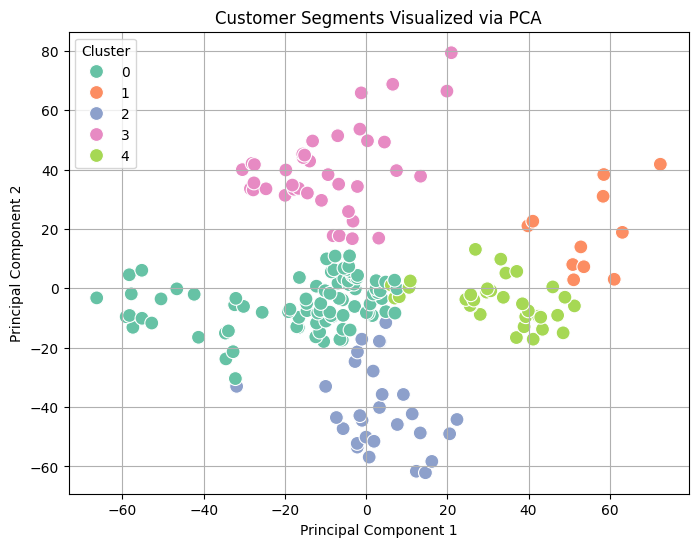

In [8]:
# 📌 Cell 8: Visualize clusters using PCA-reduced dimensions
X_pca_df['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments Visualized via PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [9]:
# 📌 Cell 9: Evaluate clustering using Silhouette Score
score = silhouette_score(X, clusters)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.358
